In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np

# Load the dataset from your local path or from Google Drive if needed
from google.colab import files; uploaded = files.upload()
# Make sure the file name matches your uploaded file

df = pd.read_csv("train.csv")

# Display the first 5 rows of the dataset
df.head()


Saving train.csv to train (1).csv


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
# Check data types and null values
df.info()

# Check for missing values in each column
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
# Convert 'Order Date' and 'Ship Date' to datetime objects
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

# Verify conversion
df[['Order Date', 'Ship Date']].head()

,Order Date,Ship Date
0,2017-11-08,2017-11-11
1,2017-11-08,2017-11-11
2,2017-06-12,2017-06-16
3,2016-10-11,2016-10-18
4,2016-10-11,2016-10-18


In [ ]:
# Shape: Number of rows and columns
print("Dataset shape:", df.shape)

# Info: Data types and missing values
print("\nDataset info:")
df.info()

# Summary stats for numeric columns
print("\nStatistical summary:")
df.describe()


Dataset shape: (9800, 18)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   

,Row ID,Order Date,Ship Date,Postal Code,Sales
count,9800.000000,9800,9800,9789.000000,9800.000000
mean,4900.500000,2017-05-01 05:13:51.673469440,2017-05-05 04:17:52.653061120,55273.322403,230.769059
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,1040.000000,0.444000
25%,2450.750000,2016-05-24 00:00:00,2016-05-27 18:00:00,23223.000000,17.248000
50%,4900.500000,2017-06-26 00:00:00,2017-06-29 00:00:00,58103.000000,54.490000
75%,7350.250000,2018-05-15 00:00:00,2018-05-19 00:00:00,90008.000000,210.605000
max,9800.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,99301.000000,22638.480000
std,2829.160653,NaN,NaN,32041.223413,626.651875


In [ ]:
# Unique categories in important columns
categorical_cols = ['Category', 'Sub-Category', 'Region', 'Segment', 'Ship Mode']
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())



Unique values in Category:
Category
Office Supplies    5909
Furniture          2078
Technology         1813
Name: count, dtype: int64

Unique values in Sub-Category:
Sub-Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: count, dtype: int64

Unique values in Region:
Region
West       3140
East       2785
Central    2277
South      1598
Name: count, dtype: int64

Unique values in Segment:
Segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64

Unique values in Ship Mode:
Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64


In [ ]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


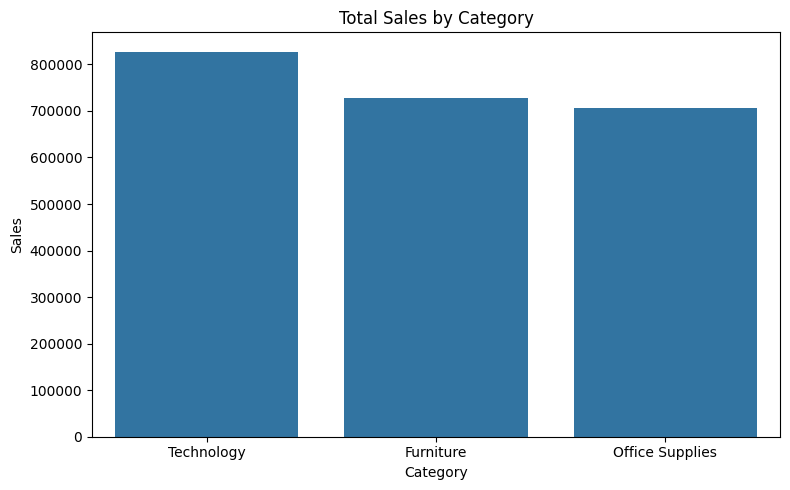

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total sales by Category
category_sales = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Total Sales by Category")
plt.ylabel("Sales")
plt.xlabel("Category")
plt.tight_layout()
plt.show()


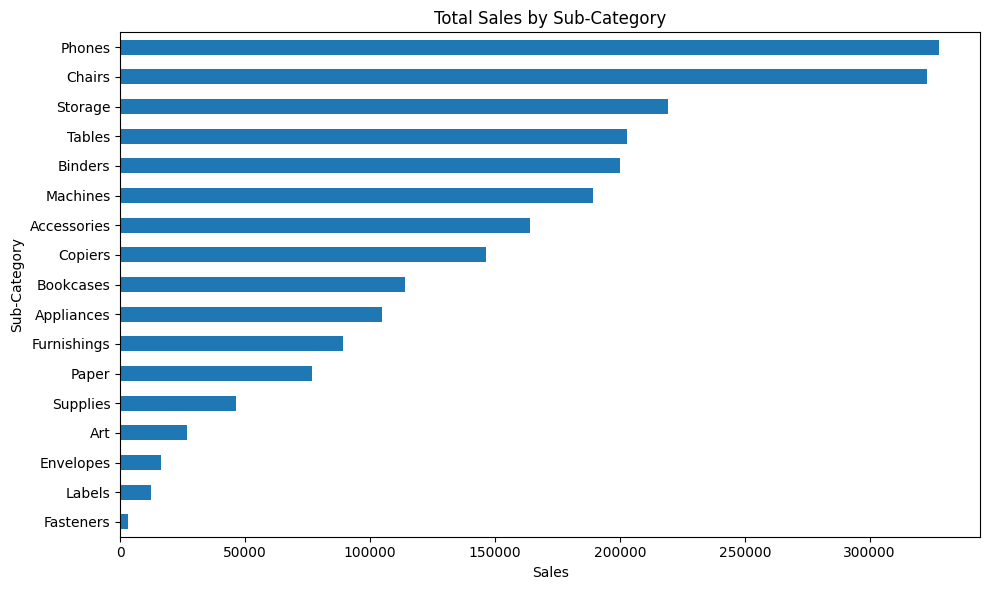

In [ ]:
# Sales by Sub-Category
subcat_sales = df.groupby("Sub-Category")["Sales"].sum().sort_values()

# Plot
plt.figure(figsize=(10,6))
subcat_sales.plot(kind='barh')
plt.title("Total Sales by Sub-Category")
plt.xlabel("Sales")
plt.ylabel("Sub-Category")
plt.tight_layout()
plt.show()


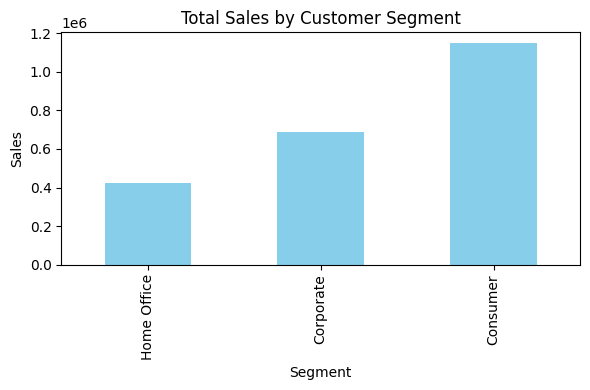

In [ ]:
# Sales by Segment
segment_sales = df.groupby("Segment")["Sales"].sum().sort_values()

# Plot
plt.figure(figsize=(6,4))
segment_sales.plot(kind='bar', color='skyblue')
plt.title("Total Sales by Customer Segment")
plt.ylabel("Sales")
plt.xlabel("Segment")
plt.tight_layout()
plt.show()


/tmp/ipython-input-15-1223859813.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette="Blues_d")


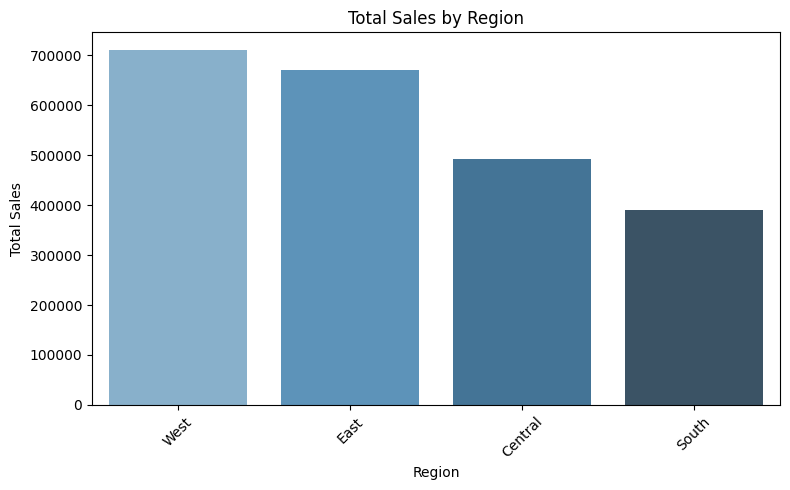

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Total sales by region
sales_by_region = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette="Blues_d")
plt.title("Total Sales by Region")
plt.ylabel("Total Sales")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-16-760698605.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette="Greens_d")


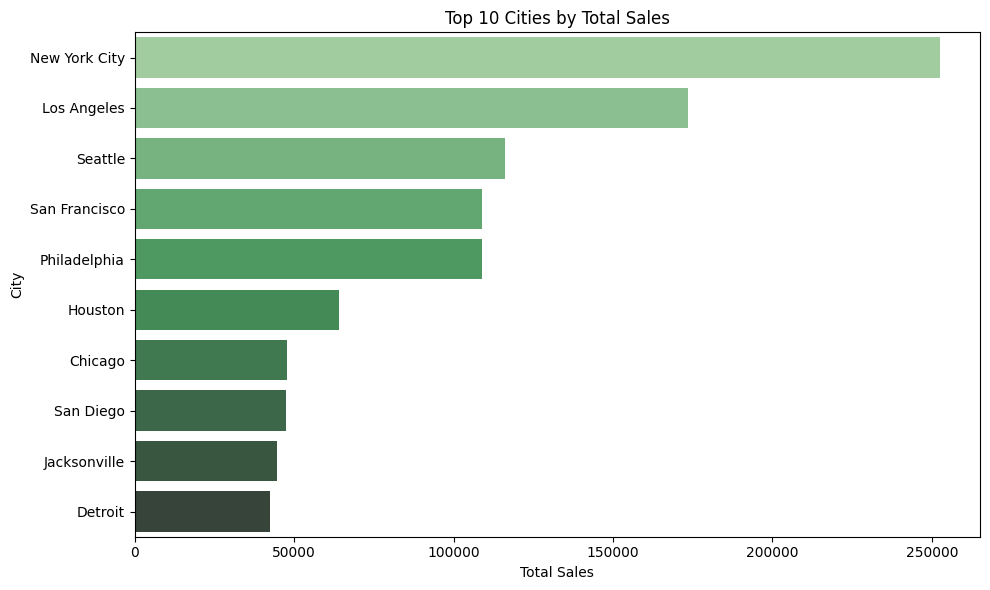

In [ ]:
# Top 10 cities by sales
top_cities = df.groupby("City")["Sales"].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="Greens_d")
plt.title("Top 10 Cities by Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("City")
plt.tight_layout()
plt.show()


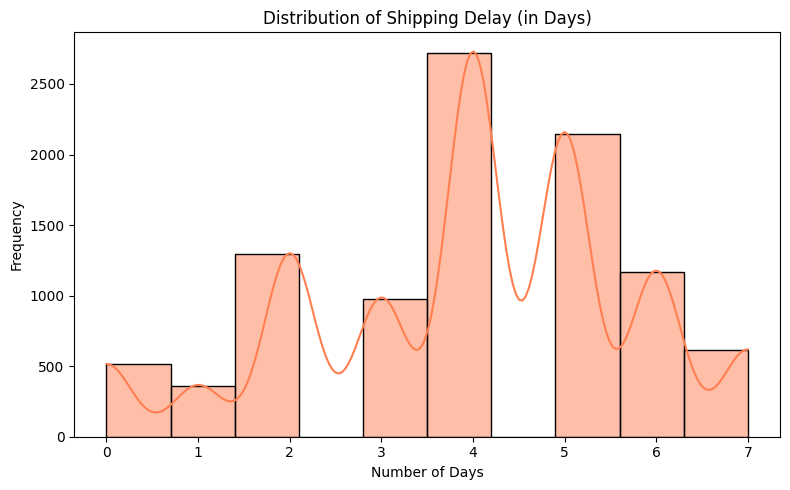

In [ ]:
# Calculate shipping delay in days
df["Order Delay"] = (df["Ship Date"] - df["Order Date"]).dt.days

# Plot distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Order Delay"], bins=10, kde=True, color="coral")
plt.title("Distribution of Shipping Delay (in Days)")
plt.xlabel("Number of Days")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


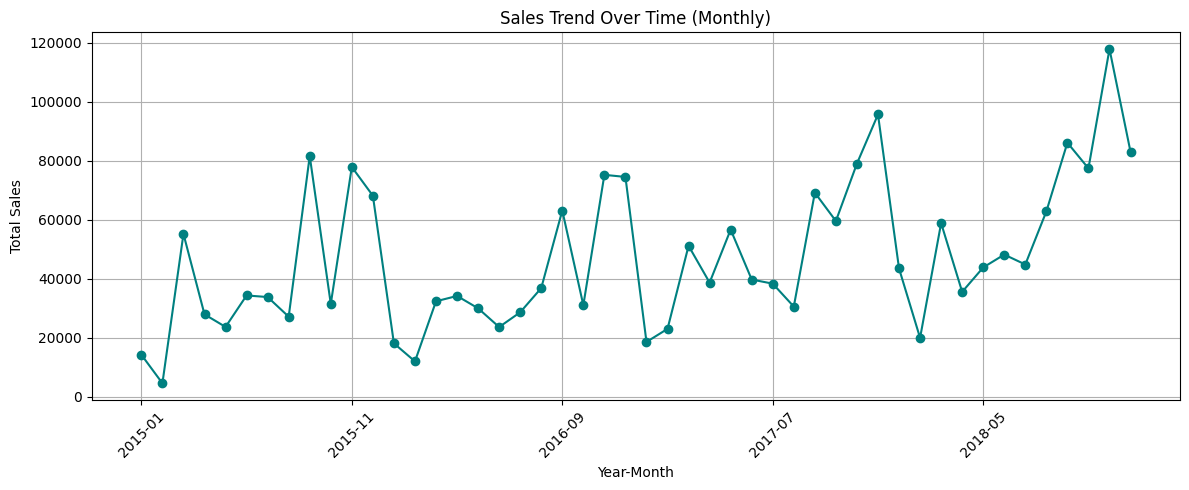

In [ ]:
# Create a new column for year and month
df["YearMonth"] = df["Order Date"].dt.to_period("M").astype(str)

# Group sales by Year-Month
monthly_sales = df.groupby("YearMonth")["Sales"].sum()

# Plot
plt.figure(figsize=(12,5))
monthly_sales.plot(kind='line', marker='o', color="teal")
plt.title("Sales Trend Over Time (Monthly)")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


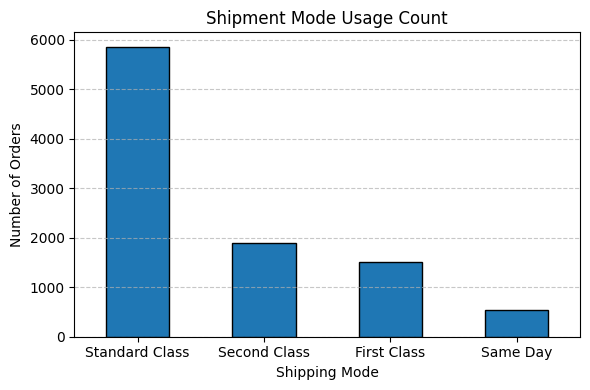

In [ ]:
# Count how many times each shipping mode is used
# Then visualize it with a bar chart

shipment_counts = df['Ship Mode'].value_counts()

plt.figure(figsize=(6,4))
shipment_counts.plot(kind='bar', edgecolor='black')
plt.title('Shipment Mode Usage Count')
plt.xlabel('Shipping Mode')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


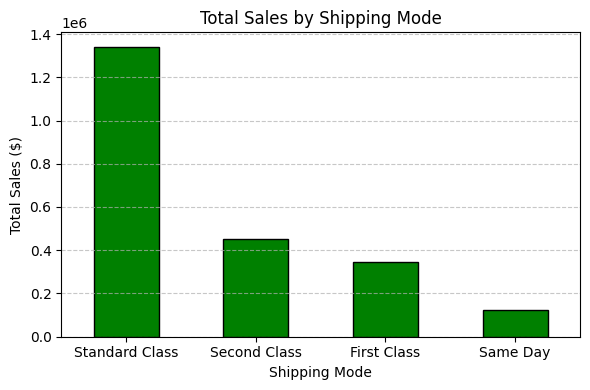

In [ ]:
# Group data by shipping mode and sum the sales
# Then visualize total sales by shipping mode

shipment_sales = df.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
shipment_sales.plot(kind='bar', color='green', edgecolor='black')
plt.title('Total Sales by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Calculate repeat customer rate
# If a customer appears more than once, they are a repeat customer

customer_order_counts = df['Customer ID'].value_counts()
repeat_customers = customer_order_counts[customer_order_counts > 1]
repeat_rate = len(repeat_customers) / len(customer_order_counts) * 100

print(f"Total Customers: {len(customer_order_counts)}")
print(f"Repeat Customers: {len(repeat_customers)}")
print(f"Repeat Customer Rate: {repeat_rate:.2f}%")


Total Customers: 793
Repeat Customers: 787
Repeat Customer Rate: 99.24%


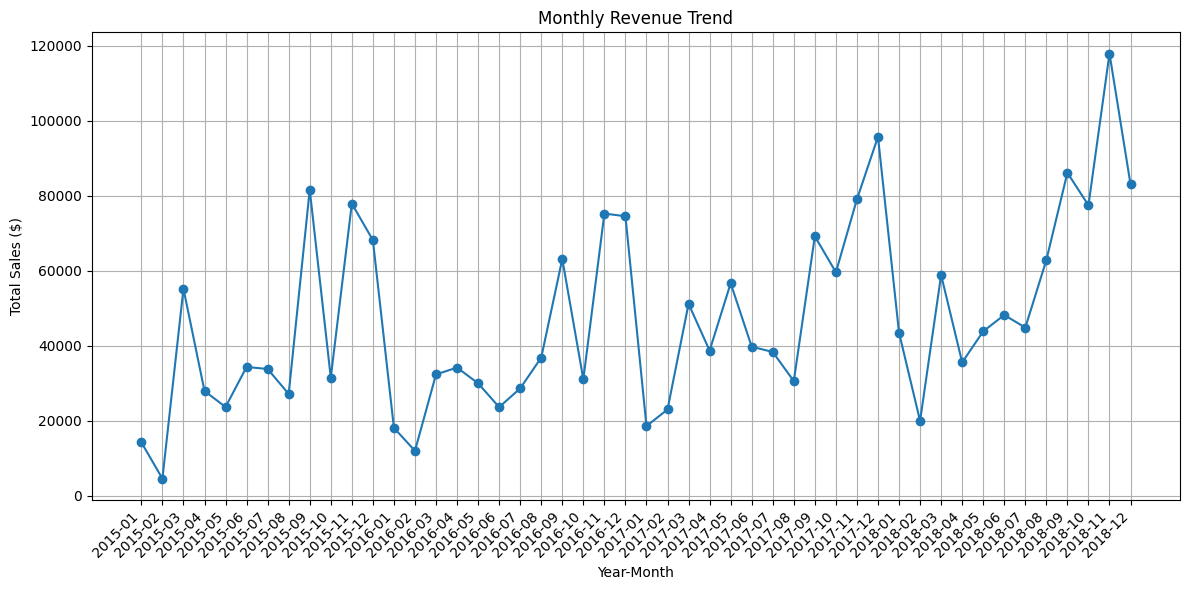

In [ ]:
# Revenue Trend Over Time (Monthly Sales)

# Extract year and month from the order date
df['Year-Month'] = df['Order Date'].dt.to_period('M')

# Group by year-month and sum the sales
monthly_sales = df.groupby('Year-Month')['Sales'].sum().reset_index()
monthly_sales['Year-Month'] = monthly_sales['Year-Month'].astype(str)

# Plotting the trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Year-Month'], monthly_sales['Sales'], marker='o')
plt.xticks(rotation=45, ha='right')
plt.title('Monthly Revenue Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


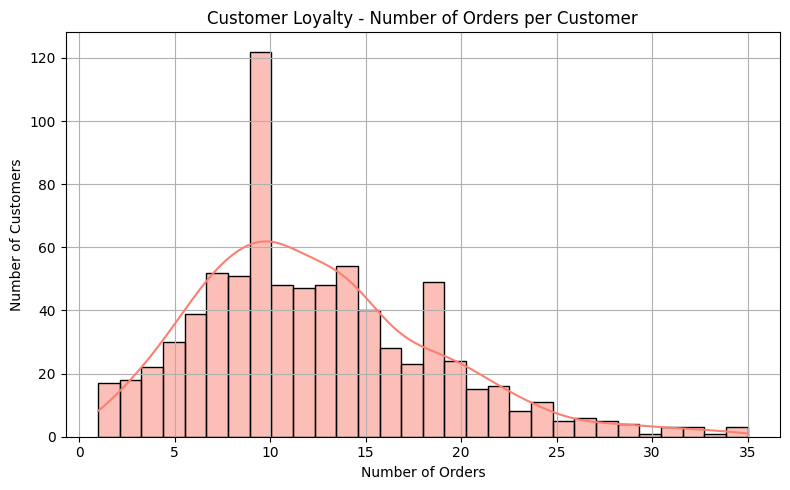

In [ ]:
import seaborn as sns

# Count number of orders per customer
customer_order_counts = df.groupby('Customer ID').size().reset_index(name='Order Count')

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.histplot(customer_order_counts['Order Count'], bins=30, kde=True, color='salmon')
plt.title('Customer Loyalty - Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import folium
from folium.plugins import HeatMap
import numpy as np

# Simulate coordinates for top 50 cities by sales
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(50).reset_index()
np.random.seed(0)
top_cities['lat'] = np.random.uniform(30.0, 50.0, size=len(top_cities))  # U.S. latitude range
top_cities['lon'] = np.random.uniform(-120.0, -70.0, size=len(top_cities))  # U.S. longitude range

# Create the map
city_map = folium.Map(location=[39.5, -98.35], zoom_start=4)  # Rough center of the US
heat_data = [[row['lat'], row['lon'], row['Sales']] for index, row in top_cities.iterrows()]
HeatMap(heat_data).add_to(city_map)

# Display in Colab
city_map


In [ ]:
df.to_csv('superstore_cleaned.csv', index=False)
